### introduction
#### Super Store is a small retail business located in the United States. They sell Furniture, Office Supplies and Technology products and their customers are the mass Consumer, Corporate and Home Offices. The data set contains sales, profit and geographical information of individual orders.

### business problem : 
#### Our task is to determine weak areas and opportunities for Super Store to boost business growth.

### Who is Reading this Analysis?
#### We assume that the Super Store is a family business and is owned by 1 or 2 owners who are very invested in their business.Owners are likely not people who are expert in reading charts or interpreting statistical analysis, so our analysis will be in layman terms and easy to understand.They needs information to make informed decisions on how to boost business profit so, our analysis focus on finding weaknesses or opportunities and providing recommendations and marketing strategies.

### importing packages and data

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly
import plotly.express as px

#### Let's have a look at the data using df.head() and df.tail() function.

In [4]:
df = pd.read_csv(r"D:\e_commerce_p\US  E-commerce records 2020.csv",encoding = 'latin1')
df.head()

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815


In [8]:
df.tail()

,Order Date,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3307,30-12-20,Standard Class,Consumer,United States,New York City,New York,East,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279
3308,30-12-20,Standard Class,Consumer,United States,New York City,New York,East,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
3309,30-12-20,Standard Class,Corporate,United States,Fairfield,California,West,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188
3310,30-12-20,Standard Class,Corporate,United States,Fairfield,California,West,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750
3311,30-12-20,Standard Class,Consumer,United States,Loveland,Colorado,West,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048


## Data Cleaning and Data Preprocessing

In [5]:
df.shape

(3312, 19)

In [3]:
df.columns

Index(['Order Date', 'Row ID', 'Order ID', 'Ship Mode', 'Customer ID',
       'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [3]:
df = df[['Order Date','Ship Mode','Segment','Country', 'City', 'State','Region',
        'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit']]

In [7]:
df.head()

,Order Date,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,01-01-20,Standard Class,Consumer,United States,Lorain,Ohio,East,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,01-01-20,Standard Class,Consumer,United States,Los Angeles,California,West,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,01-01-20,First Class,Home Office,United States,Franklin,Wisconsin,Central,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,01-01-20,Standard Class,Consumer,United States,Huntsville,Texas,Central,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,01-01-20,Standard Class,Consumer,United States,Huntsville,Texas,Central,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815


#### Here, we will do a descriptive statistical analysis.

In [9]:
df.describe().round(2)

,Sales,Quantity,Discount,Profit
count,3312.00,3312.00,3312.00,3312.00
mean,221.38,3.77,0.16,28.21
std,585.26,2.22,0.21,241.86
min,0.44,1.00,0.00,-3839.99
25%,17.02,2.00,0.00,1.76
50%,53.81,3.00,0.20,8.30
75%,205.11,5.00,0.20,28.32
max,13999.96,14.00,0.80,6719.98


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    3312 non-null   object 
 1   Ship Mode     3312 non-null   object 
 2   Segment       3312 non-null   object 
 3   Country       3312 non-null   object 
 4   City          3312 non-null   object 
 5   State         3312 non-null   object 
 6   Region        3312 non-null   object 
 7   Category      3312 non-null   object 
 8   Sub-Category  3312 non-null   object 
 9   Product Name  3312 non-null   object 
 10  Sales         3312 non-null   float64
 11  Quantity      3312 non-null   int64  
 12  Discount      3312 non-null   float64
 13  Profit        3312 non-null   float64
dtypes: float64(3), int64(1), object(10)
memory usage: 232.9+ KB


### Data Cleaning
#### Before we start with the analysis, we must first clean the data or “scrub the dirt”. 
#### For this analysis, we will look at the more common issues such as missing and duplicate data.
#### Handling Missing Values

In [10]:
df.isnull().sum()

Order Date      0
Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Product Name    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

#### The result shows that the data set does not have any null value.

#### Duplicate Data
#### Then, we will find out whether there is duplicate data.

In [11]:
df.duplicated().sum()

0

#### The result also shows that the data set does not have any duplicate value.

In [6]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [7]:
df.dtypes

Order Date      datetime64[ns]
Ship Mode               object
Segment                 object
Country                 object
City                    object
State                   object
Region                  object
Category                object
Sub-Category            object
Product Name            object
Sales                  float64
Quantity                 int64
Discount               float64
Profit                 float64
dtype: object

# Exploratory Data Analysis (EDA)

In [7]:
df['Segment'].unique()

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

#### Which Segment is Best Selling and Most Profitable?

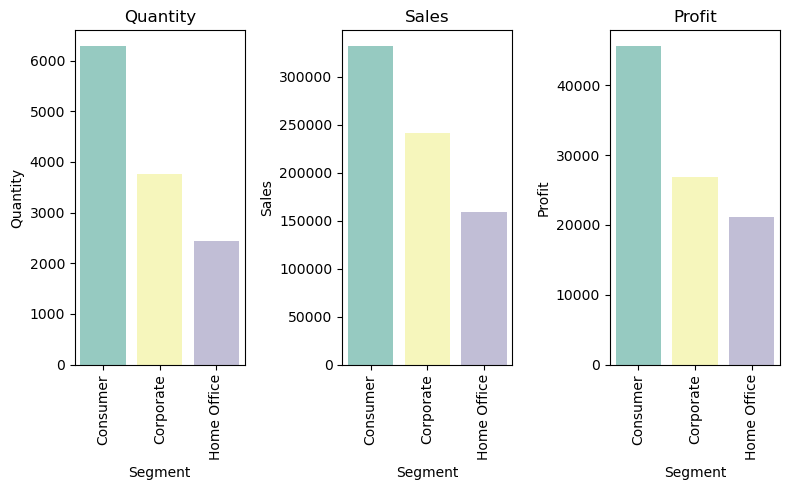

In [28]:
Segment_distribution=df.groupby('Segment')[['Quantity','Sales','Profit']].sum().reset_index()
plt.figure(figsize=(8,5))
plt.subplot(1,3,1)
sns.barplot(x=Segment_distribution['Segment'],y=Segment_distribution['Quantity'],palette='Set3')
plt.xticks(rotation=90)
plt.title('Quantity')

plt.subplot(1,3,2)
sns.barplot(x=Segment_distribution['Segment'],y=Segment_distribution['Sales'],palette='Set3')
plt.xticks(rotation=90)
plt.title('Sales')


plt.subplot(1,3,3)
sns.barplot(x=Segment_distribution['Segment'],y=Segment_distribution['Profit'],palette='Set3')
plt.xticks(rotation=90)
plt.title('Profit')


plt.tight_layout()
plt.show()

### observation
#### 1- consumer segment is selling top for profit , sales and quantity sold
#### 2- corporate segment is second for profit , sales and quantity sold
#### 3- while home office segment is third profit , sales and quantity sold

#### Which Category is Best Selling and Most Profitable?

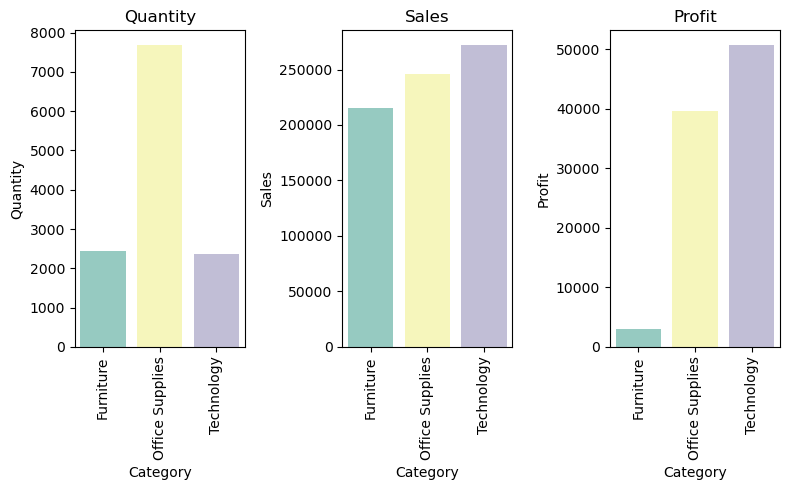

In [29]:
Segment_distribution=df.groupby('Category')[['Quantity','Sales','Profit']].sum().reset_index()
plt.figure(figsize=(8,5))
plt.subplot(1,3,1)
sns.barplot(x=Segment_distribution['Category'],y=Segment_distribution['Quantity'],palette='Set3')
plt.xticks(rotation=90)
plt.title('Quantity')

plt.subplot(1,3,2)
sns.barplot(x=Segment_distribution['Category'],y=Segment_distribution['Sales'],palette='Set3')
plt.xticks(rotation=90)
plt.title('Sales')


plt.subplot(1,3,3)
sns.barplot(x=Segment_distribution['Category'],y=Segment_distribution['Profit'],palette='Set3')
plt.xticks(rotation=90)
plt.title('Profit')


plt.tight_layout()
plt.show()

### observations 
#### 1- All 3 categories - Furniture, Office Supplies and Technology make similar amount of sales.
#### 2-Technology is Best Selling and it's good to know that this category is the Most Profitable too. Only minimal quantity is sold as these products are usually one-off purchases that can last at least 4-5 years.
#### 3- Although Furniture makes similar sales as Technology, it is the least profitable and quantity sold are at a minimum too.
#### 4- Office Supplies sells the most in terms of quantity as it is relatively cheap product.

#### exploring the correlation between our numeric columns

In [10]:
correlations = df[['Sales','Quantity','Discount','Profit']].corr().round(2)
correlations

,Sales,Quantity,Discount,Profit
Sales,1.00,0.19,-0.03,0.53
Quantity,0.19,1.00,0.02,0.05
Discount,-0.03,0.02,1.00,-0.22
Profit,0.53,0.05,-0.22,1.00


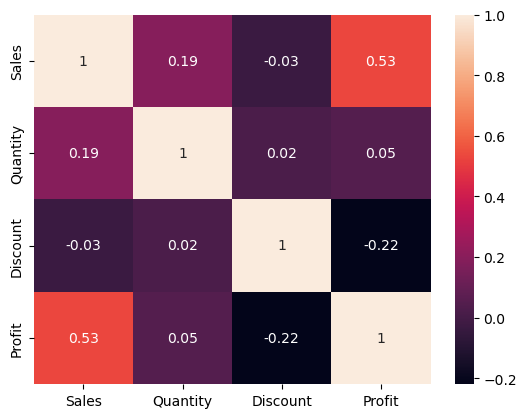

In [11]:
sns.heatmap(data=correlations,annot=True);

### Observation
#### 1- there's a strong positive correlation between Sales and profit for sure
#### 2- there's a strong negative correlation between Sales,profit and discount we will focus on this corr as it affects alot sales and profits 

### Which is the Preferred Ship Mode?

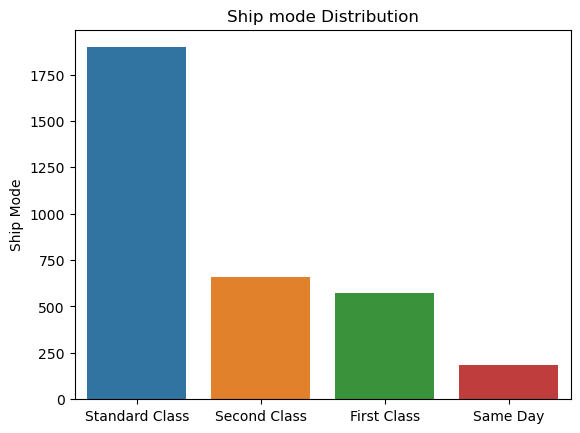

In [37]:
shipmode_distribution = df['Ship Mode'].value_counts()
sns.barplot(x=shipmode_distribution.index,y=shipmode_distribution)
plt.title("Ship mode Distribution")
plt.show()

### observation
#### 1- By a landslide, Standard Class is the preferred method of shipment and perhaps the cheapest one too. The other modes are not popular among the customers and may be too costly

### which region is top for sales and profit ?

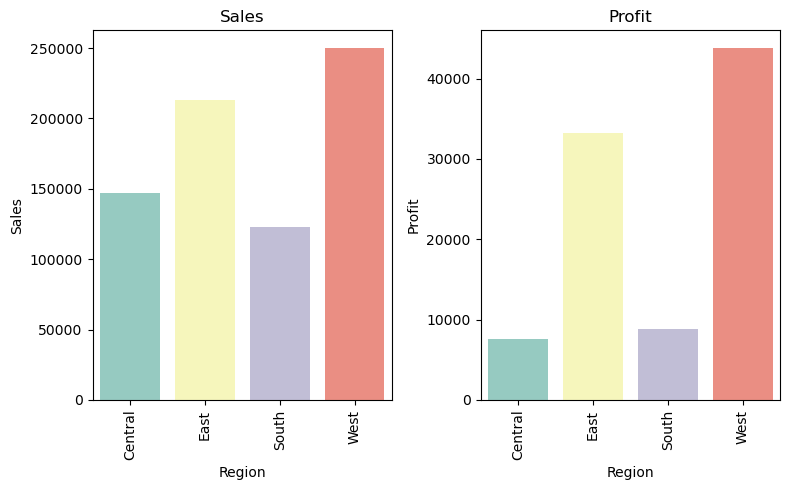

In [41]:
Region_numbers=df.groupby('Region')[['Sales','Profit']].sum().reset_index()
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
sns.barplot(x=Region_numbers['Region'],y=Region_numbers['Sales'],palette='Set3')
plt.xticks(rotation=90)
plt.title('Sales')

plt.subplot(1,2,2)
sns.barplot(x=Region_numbers['Region'],y=Region_numbers['Profit'],palette='Set3')
plt.xticks(rotation=90)
plt.title('Profit')
plt.tight_layout()
plt.show()

#### observation
### 1- west and east are the most profitable and delivering regions in terms of sales and profit
### 2- central and south are the least profitable and delivering regions in terms of sales and profit

In [47]:
#central region with the least profit as it was on top for discounts
df[['Region','Discount']].groupby('Region')['Discount'].mean().reset_index().sort_values(by='Discount',ascending=False)

,Region,Discount
0,Central,0.239614
2,South,0.155405
1,East,0.147774
3,West,0.105205


#### observation
### 1- central and south are the most for discounts , says alot when we saw later they have the least sales and profits

### What are the Best Selling and Most Profitable Sub-Category?

In [52]:
subcategory_sales=df.groupby('Sub-Category')[['Sales','Profit']].sum().reset_index().sort_values(by='Sales',ascending=False)
subcategory_sales

,Sub-Category,Sales,Profit
13,Phones,105340.5160,12849.3250
5,Chairs,95554.3530,7643.5493
3,Binders,72788.0450,7669.7418
14,Storage,69677.6180,7402.8007
6,Copiers,62899.3880,25031.7902
16,Tables,60893.5425,-8140.6947
0,Accessories,59946.2320,15672.3570
11,Machines,43544.6750,-2869.2156
1,Appliances,42926.9320,7865.2683
4,Bookcases,30024.2797,-583.6261


In [53]:
subcategory_profit=df.groupby('Sub-Category')[['Sales','Profit']].sum().reset_index().sort_values(by='Profit',ascending=False)
subcategory_profit

,Sub-Category,Sales,Profit
6,Copiers,62899.3880,25031.7902
0,Accessories,59946.2320,15672.3570
13,Phones,105340.5160,12849.3250
12,Paper,27694.7180,12040.8434
1,Appliances,42926.9320,7865.2683
3,Binders,72788.0450,7669.7418
5,Chairs,95554.3530,7643.5493
14,Storage,69677.6180,7402.8007
9,Furnishings,28915.0940,4099.1628
2,Art,8863.0680,2221.9631


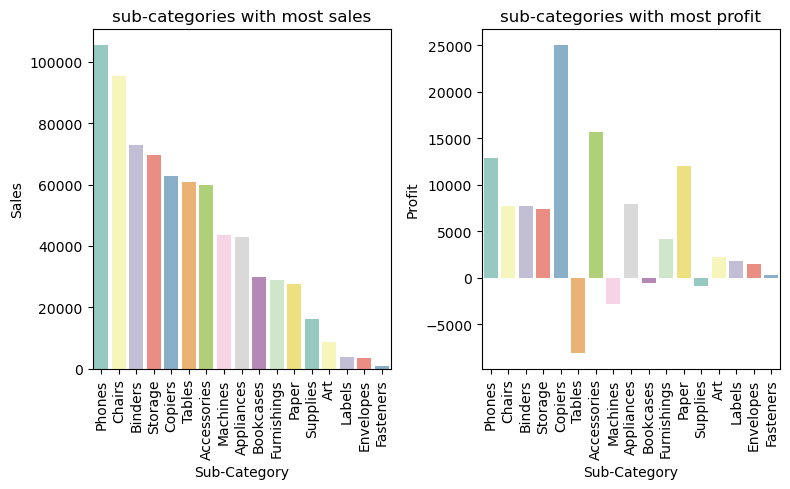

In [56]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
sns.barplot(x=subcategory_sales['Sub-Category'],y=subcategory_sales['Sales'],palette='Set3')
plt.xticks(rotation=90)
plt.title('sub-categories with most sales')

plt.subplot(1,2,2)
sns.barplot(x=subcategory_sales['Sub-Category'],y=subcategory_sales['Profit'],palette='Set3')
plt.xticks(rotation=90)
plt.title('sub-categories with most profit')
plt.tight_layout()
plt.show()

### observation
#### 1- Phones and Chairs are Top 2 best selling sub-category.
#### 2-Copiers produces most profit, followed by Phones, Accessories, Papers and Binders. The marketing strategy has to focus on marketing these products.
#### 4-On the other end of the spectrum, Machines, Fasteners, Supplies, Bookcases and Tables make close to zero margin to losses. These are products that Super Store can consider dropping from the product catalogue or increase the sale price and profit margin or bargain for a lower price from the supplier.

### Which is the Top Selling Sub-Category?

In [59]:
sub_quantity=df.groupby('Sub-Category')['Quantity'].sum().reset_index().sort_values(by='Quantity',ascending=False)
sub_quantity

,Sub-Category,Quantity
3,Binders,2067
12,Paper,1702
2,Art,1101
9,Furnishings,1097
13,Phones,1090
0,Accessories,1079
14,Storage,1022
5,Chairs,674
1,Appliances,654
10,Labels,448


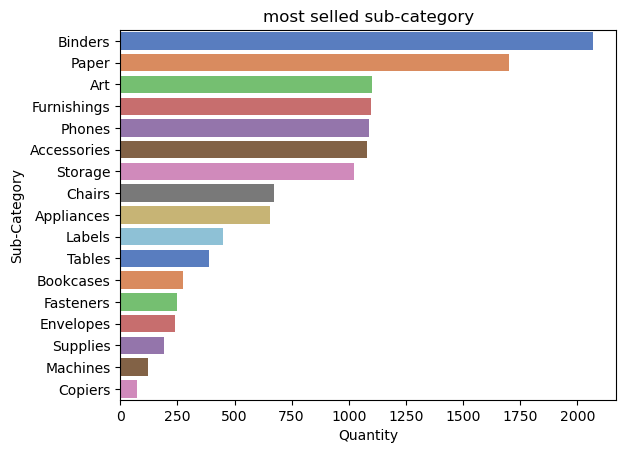

In [62]:
sns.barplot(x=sub_quantity['Quantity'],y=sub_quantity['Sub-Category'],palette='muted')
plt.title('most selled sub-category')
plt.show()

### Here, we can deduce that

#### 1- Super Store should ensure inventory are always well-stocked for the top selling sub-category such as Binders, Paper, Furnishings and Phones.
#### 2-Despite being most profitable, Copiers sell the least only 73, but as it is a relatively expensive office equipment that is usually used for few years, it is understandable that it sells the least among all.

### who are our top 10 cities for sales ?
### who are our bottom 10 cities for sales ? 

In [6]:
t10city_sales= df.groupby('City')['Sales'].sum().reset_index().sort_values(by='Sales',ascending=False).head(10)
t10city_sales
b10city_sales = df.groupby('City')['Sales'].sum().reset_index().sort_values(by='Sales',ascending=False).tail(10)
b10city_sales

,City,Sales
146,Keller,6.000
192,Mesquite,5.184
130,Hickory,4.572
306,Springdale,4.300
345,Woodstock,2.912
233,Ormond Beach,2.808
82,Edinburg,2.368
145,Jupiter,2.064
86,Elyria,1.824
1,Abilene,1.392


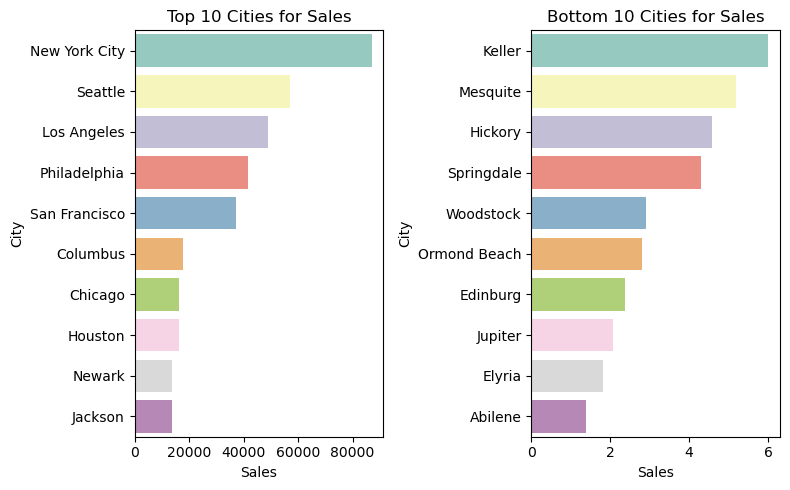

In [17]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
sns.barplot(y=t10city_sales['City'],x=t10city_sales['Sales'],palette='Set3')
plt.title('Top 10 Cities for Sales')

plt.subplot(1,2,2)
sns.barplot(y=b10city_sales['City'],x=b10city_sales['Sales'],palette='Set3')
plt.title('Bottom 10 Cities for Sales')
plt.tight_layout()
plt.show()

### observation
#### There is a huge disparity between the cities with highest sales and lowest sales. 
#### Marketing strategy has to target the top 10 cities.

### who are our top 10 cities for profit ?
### who are our bottom 10 cities for profit ? 

In [25]:
top10_city_profit = df.groupby('City')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False).head(10)
top10_city_profit
bottom10_city_profit=df.groupby('City')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False).tail(10)
bottom10_city_profit

,City,Profit
250,Phoenix,-578.0855
142,Jacksonville,-580.2001
150,Knoxville,-1032.4518
187,Memphis,-1228.7608
65,Dallas,-2224.4558
175,Louisville,-2402.4528
135,Houston,-3853.7396
249,Philadelphia,-4995.0863
31,Burlington,-5404.3720
45,Chicago,-5701.1304


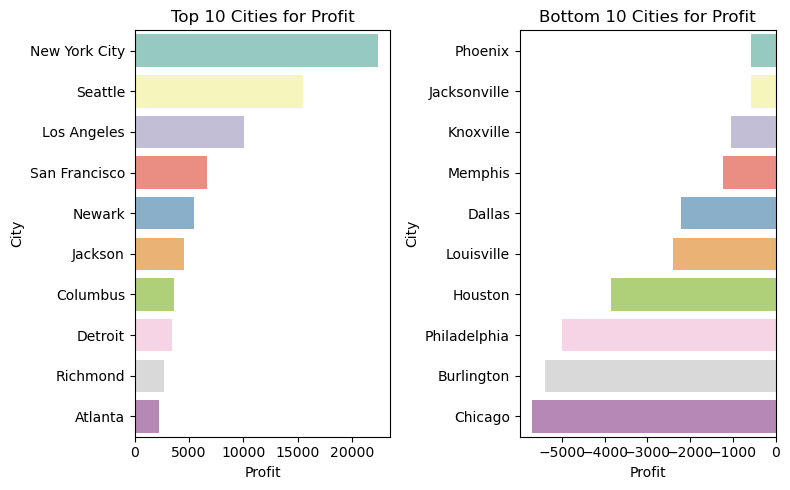

In [27]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
sns.barplot(y=top10_city_profit['City'],x=top10_city_profit['Profit'],palette='Set3')
plt.title('Top 10 Cities for Profit')

plt.subplot(1,2,2)
sns.barplot(y=bottom10_city_profit['City'],x=bottom10_city_profit['Profit'],palette='Set3')
plt.title('Bottom 10 Cities for Profit')
plt.tight_layout()
plt.show()

### observation
#### we see that new york city, seattle, los angeles and san francisco are the most profitable cities
#### clearly our marketing campaign there was a success we may have to keep that up
#### on the other hand we see that chicago, burlington, phili, houston,louisville,dallas
#### ,memphis,knoxville,jacksonvill are costing us money as they are losing, a new marketing campaign is highely needed
#### there to rebuild a trust between the company and their customers

#### now it's time to answer the same qustion but for states

In [36]:
t10_state_sales =df.groupby('State')['Sales'].sum().reset_index().sort_values(by='Sales',ascending=False).head(10)
b10_state_sales=df.groupby('State')['Sales'].sum().reset_index().sort_values(by='Sales',ascending=False).tail(10)
b10_state_sales

,State,Sales
37,South Carolina,1560.750
26,New Hampshire,1509.430
10,Idaho,1233.548
45,West Virginia,1209.824
38,South Dakota,1153.410
31,North Dakota,919.910
42,Vermont,842.210
14,Kansas,733.150
13,Iowa,716.410
7,District of Columbia,77.760


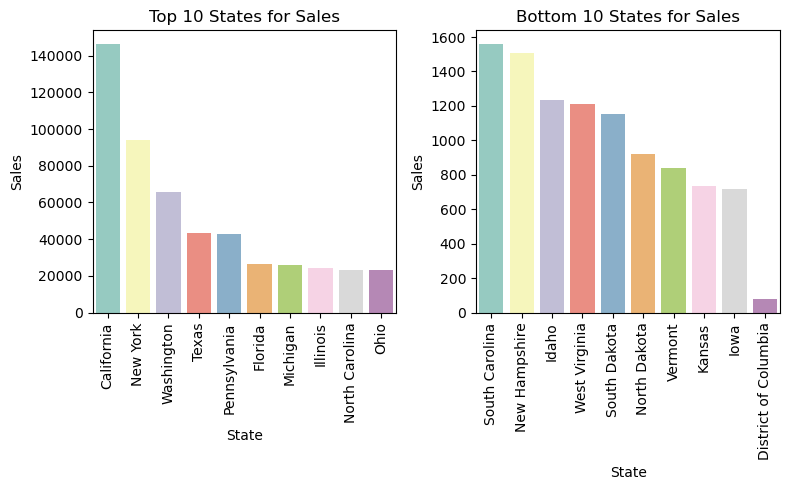

In [37]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
sns.barplot(y=t10_state_sales['Sales'],x=t10_state_sales['State'],palette='Set3')
plt.title('Top 10 States for Sales')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(y=b10_state_sales['Sales'],x=b10_state_sales['State'],palette='Set3')
plt.title('Bottom 10 States for Sales')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### observation
#### we see that california, new york,washington and san francisco are the most selling states
#### clearly our marketing campaign there was a success we may have to keep that up
#### on the other hand we see that district of columvia,lowa, 
#### kansas and vermont have the least sales so we may have offer these states new offers to attract them to buy

## on a profitable mindset 

In [39]:
t10_state_profit =df.groupby('State')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False).head(10)
b10_state_profit=df.groupby('State')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False).tail(10)
b10_state_profit

,State,Profit
7,District of Columbia,35.0640
34,Oregon,-377.1257
1,Arizona,-1276.0025
32,Ohio,-1736.5270
39,Tennessee,-3304.2866
4,Colorado,-4435.8483
30,North Carolina,-5088.5334
35,Pennsylvania,-5112.8034
11,Illinois,-6745.5600
40,Texas,-8838.5049


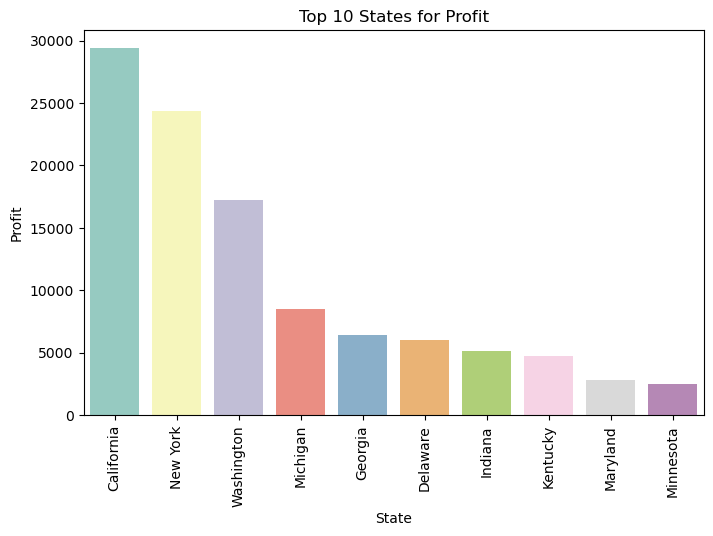

In [43]:
plt.figure(figsize=(8,5))
sns.barplot(y=t10_state_profit['Profit'],x=t10_state_profit['State'],palette='Set3')
plt.title('Top 10 States for Profit')
plt.xticks(rotation=90)
plt.show()

### observation
#### california,new york, washington and michigan our most profitable states

### what are our top 10 products in terms of quantity sold ?

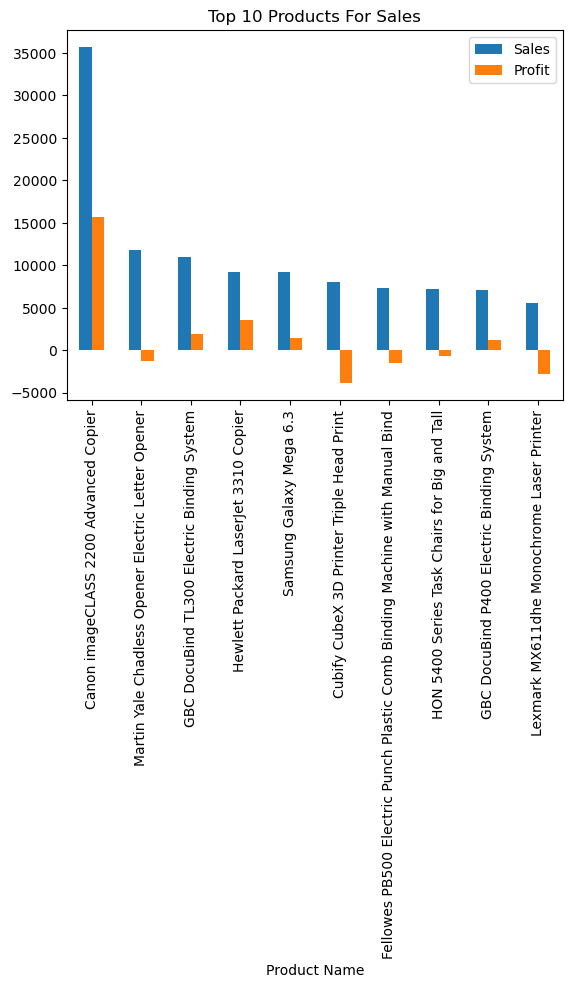

In [12]:
df.groupby('Product Name')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False).head(10).plot(kind='bar',title='Top 10 Products For Sales');

### observation
#### canoon image class 2200 advanced copier is our top selling product and also our most profitable,that's a good sign
#### excluding our top selling product, our top 9 selling products are providing similar numbers for silling.
#### but the main focus here is on martin yale chadles opener ,cubify cubix 3d prenter, fellowes pb500
#### ,hon 504 series task chair and lexmark mx611dhe laser printer as these products are losing already,that's 
#### a bad sign for the business

### we may have to explore the correlation between discount and profit a bit more
### for explanatory purposes

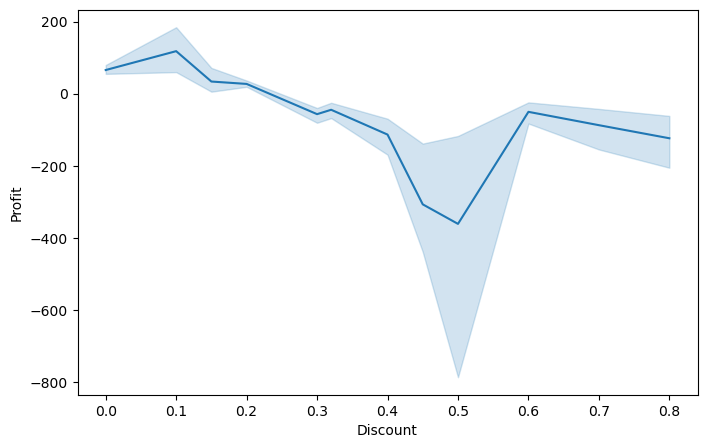

In [16]:
#identifying the relationship between discount and profit
plt.figure(figsize=(8,5))
sns.lineplot(data=df,x='Discount',y='Profit');

### observation
#### we see that whenever the discount increases profit drops, however i'm not a fan of the discount method as i feel
#### you may may lose your customers trust, or it may bring customers who are searching only for a discounted product

In [33]:
#which products provides us with most profit
products_highprofit= df[['Product Name','Profit']].groupby('Product Name')['Profit'].sum().nlargest(10).reset_index().round()
products_highprofit

,Product Name,Profit
0,Canon imageCLASS 2200 Advanced Copier,15680.0
1,Hewlett Packard LaserJet 3310 Copier,3624.0
2,GBC DocuBind TL300 Electric Binding System,1911.0
3,Fellowes PB300 Plastic Comb Binding Machine,1754.0
4,Canon Image Class D660 Copier,1692.0
5,Canon Imageclass D680 Copier / Fax,1680.0
6,Hewlett-Packard Desktjet 6988DT Refurbished Pr...,1668.0
7,Samsung Galaxy Mega 6.3,1470.0
8,"3D Systems Cube Printer, 2nd Generation, Magenta",1352.0
9,GBC DocuBind 300 Electric Binding Machine,1347.0


### which products are commonly profitable for us ?

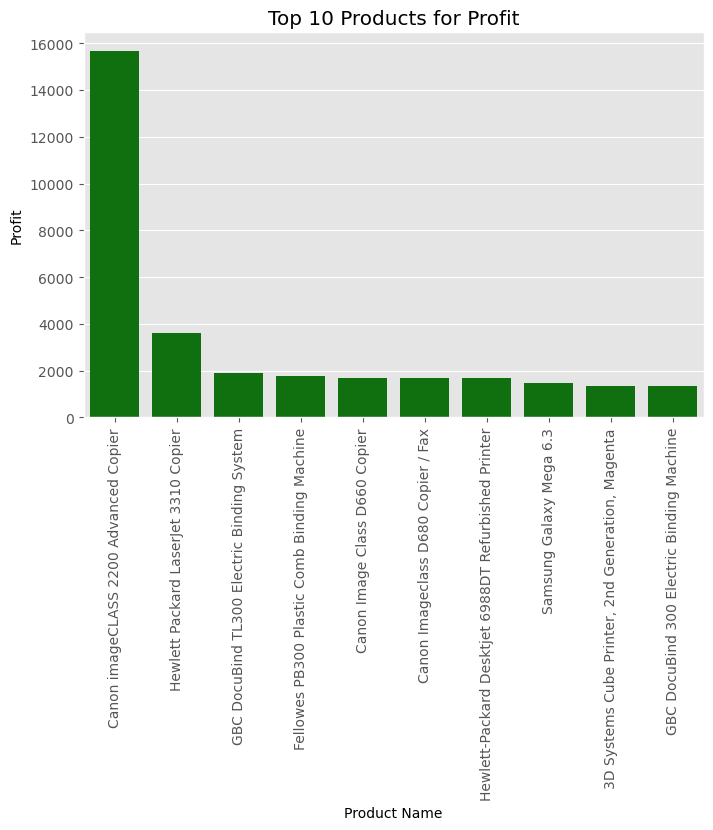

In [34]:
#Canon imageCLASS 2200 Advanced Copier is leading the way for profit
plt.figure(figsize=(8,5))
plt.title('Top 10 Products for Profit')
plt.xticks(rotation='vertical')
sns.barplot(x= products_highprofit['Product Name'],y=products_highprofit['Profit'],color='green');

### Observation
#### Canon imageCLASS 2200 Advanced Copier is on top for sales also for profits
#### Hewlett Packard LaserJet 3310 Copier is second for profit
#### GBC DocuBind TL300 Electric Binding System is third

### which products have the least sales?

In [37]:
least_sales_products = df[['Product Name','Sales']].groupby('Product Name')['Sales'].sum().tail(10).reset_index().sort_values(by='Sales')
least_sales_products

,Product Name,Sales
0,XtraLife ClearVue Slant-D Ring Binders by Card...,11.760
2,Zipper Ring Binder Pockets,35.256
1,Zebra Zazzle Fluorescent Highlighters,42.560
5,iKross Bluetooth Portable Keyboard + Cell Phon...,67.040
6,iOttie HLCRIO102 Car Mount,119.940
3,i.Sound Portable Power - 8000 mAh,137.774
9,netTALK DUO VoIP Telephone Service,167.968
8,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,205.086
7,iOttie XL Car Mount,223.888
4,iHome FM Clock Radio with Lightning Dock,643.908


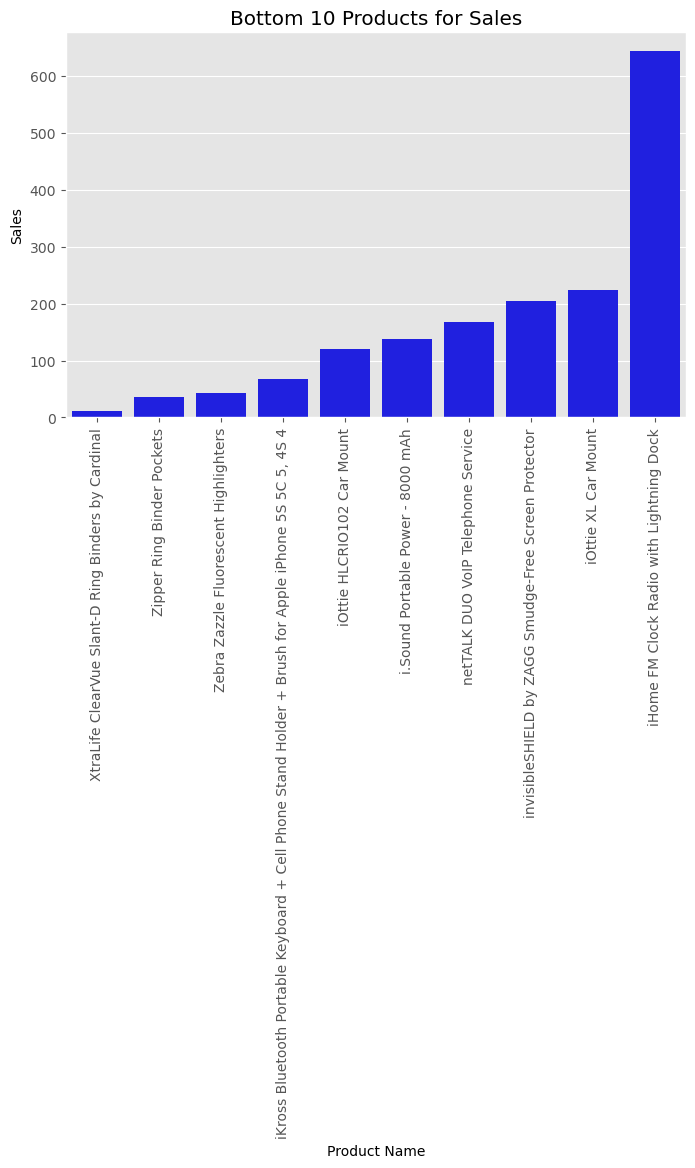

In [39]:
plt.figure(figsize=(8,5))
plt.title('Bottom 10 Products for Sales')
plt.xticks(rotation='vertical')
sns.barplot(x= least_sales_products['Product Name'],y=least_sales_products['Sales'],color='blue');

### Observation
#### XtraLife ClearVue Slant-D Ring Binders by Card down there on top as the least product sold
#### Zipper Ring Binder Pockets is also there among the least products sold
#### Zebra Zazzle Fluorescent Highlighters is also there

### now it's time to have a look at a lossing dataframe to identify directly the weak areas

In [18]:
losses = df[df.Profit <=0]
losses.head()

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815
5,01-01-20,8072,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-CH-10003199,Furniture,Chairs,Office Star - Contemporary Task Swivel Chair,310.744,4,0.3,-26.6352
7,01-01-20,8074,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-BI-10000301,Office Supplies,Binders,GBC Instant Report Kit,6.470,5,0.8,-9.7050
8,01-01-20,8075,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-BI-10000343,Office Supplies,Binders,"Pressboard Covers with Storage Hooks, 9 1/2"" x...",13.748,14,0.8,-22.6842


### what is the region with the most losses ? 

In [19]:
losses.Region.value_counts()

Central    248
East       183
West       113
South       95
Name: Region, dtype: int64

### Observation 
### most losses came from central region ,the region with the most discounts

In [23]:
losses['Profit'] = losses['Profit'].abs()

C:\Users\BG\AppData\Local\Temp\ipykernel_4832\430541114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  losses['Profit'] = losses['Profit'].abs()


In [24]:
region_losses = losses.groupby('Region')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False).round()
region_losses

,Region,Profit
0,Central,20509.0
2,South,12365.0
1,East,11897.0
3,West,9066.0


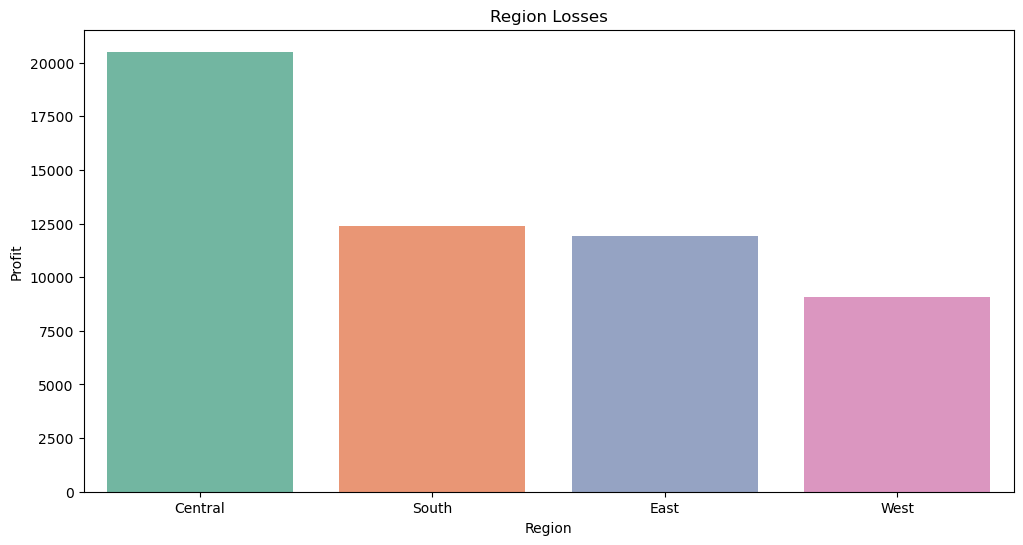

In [25]:
plt.figure(figsize = (12,6))
plt.title('Region Losses')
sns.barplot(x=region_losses['Region'],y=region_losses['Profit'],palette='Set2');

### Observation 

#### unsurprisingly "Central" region is leading the way in losses,we clearified that it has the most discounts
#### then we have south region as second for losses who also is second for discounts

### identifying which category is leading in losses.

In [26]:
category_losses = losses.groupby('Category')['Profit'].sum().round()
category_losses

Category
Furniture          19292.0
Office Supplies    21743.0
Technology         12802.0
Name: Profit, dtype: float64

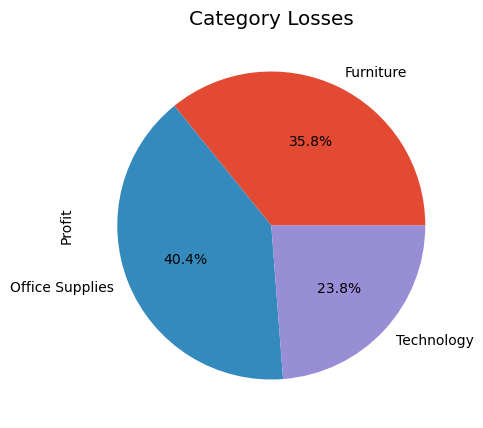

In [28]:
plt.figure(figsize=(8,5))
plt.style.use('ggplot')
plt.title('Category Losses')
category_losses.plot.pie(autopct="%.1f%%");

### Observation 
#### office supplies as a category is leading in losses with 41% of total losses
#### then second is furniture with 36 of total losses
#### then tec with 24% of total losses

### which sub-category has the highest numbers of discount?

In [59]:
losses.groupby('Sub-Category')['Discount'].sum().reset_index().sort_values(by='Discount',ascending=False)

,Sub-Category,Discount
2,Binders,151.50
6,Furnishings,25.00
11,Tables,24.80
1,Appliances,21.60
4,Chairs,20.90
8,Phones,16.80
3,Bookcases,13.27
9,Storage,10.60
7,Machines,6.60
0,Accessories,5.60


### observation
#### we see that binders, furnishings, tables all have the highest numbers in discounts

### General Conclusion 

#### discount plan of the company wasn't a success , discount offers have to be only for loyal customers who will benefit the company not just with the products with discount also you've worked so hard for your brand so don't give customers a reason to question if your price is fair, the sales team may have to go with another plan like increasing the value of products, renegotiating cost with vendors or suppliers and showing your value by educating your consumer and bringing them into your process and explaining the value of your products to them.

### Recommendations
#### 1- Focus on Technology sub-category and Phones and Chairs as they are highest selling and most profitable. Bundle them with the less profitable products such as Bookcases, Table and Chairs to offset the losses.
#### 2- Selling Bookcases and Tables result in huge losses, so Super Store has to consider to bundle them together with High Selling or Profitable sub-category such as Chairs, Copiers, Phones and Office Supplies products.
#### 3- For Home Offices customers, these people might be busy with work and less likely to spend time selecting individual products, so create a Home Office package with products used for offices such as table, chairs, phone, copiers, storage, label, fasteners, bookcases.
#### 4- For loss-making products like Supplies, Bookcases, Tables, consider to either drop these from the catalogue or change suppliers and bargain for cheaper price.
#### 5- Consumer and Corporate Segment make up more than 70% of customerbase. Target them, especially customers from the East and West region in the Top 10 cities with Highest Sales by introducing special promotions and bundles for mass Consumer and Home Offices and send promotional emails or flyers.